# Outline
    Will be fixed later

### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

- Limit Balance: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- Sex: Gender (1 = male; 2 = female).
- Education: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- Mariage: Marital status (1 = married; 2 = single; 3 = others).
- Age: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005;
- X7 = the repayment status in August, 2005; . . .;
- X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). 
- X12 = amount of bill statement in September, 2005; 
- X13 = amount of bill statement in August, 2005; . . .; 
- X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). 
- X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;
- X23 = amount paid in April, 2005.

## Import Libaries

In [3263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_auc_score

## Import Data

In [3162]:
df = pd.read_excel('default-of-credit-card-clients.xls', skiprows= 1)

In [3163]:
# a copy of original dataset
df_copy = df.copy()

In [3164]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [3165]:
df.info() 

# there is no missing value
# all variables are integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Data Preparation and Cleaning

In [3166]:
# i will remove the id 
del df['ID']

In [3167]:
# rename the default payment next month 
df.rename(columns = {'default payment next month':'default_payment'}, inplace = True)

In [3168]:
# rename the pay_0 to pay_1
df.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)

In [3169]:
# convert columns name  to lowercase
df.columns = df.columns.str.lower()

In [3170]:
df.columns

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment'],
      dtype='object')

### Mapping on Categorilca Varieables

#### Categorical Variables 

- Sex: (1 = male; 2 = female).
- Education: (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- Marial status: (1 = married; 2 = single; 3 = others).
-  the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

In [3171]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment'],
      dtype='object')

##### For Payment Status

In [3172]:
pay_status = ['pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6']

for i in pay_status:
    print(df[i].nunique())
    print(df[i].value_counts().head(2))

11
 0    14737
-1     5686
Name: pay_1, dtype: int64
11
 0    15730
-1     6050
Name: pay_2, dtype: int64
11
 0    15764
-1     5938
Name: pay_3, dtype: int64
11
 0    16455
-1     5687
Name: pay_4, dtype: int64
10
 0    16947
-1     5539
Name: pay_5, dtype: int64
10
 0    16286
-1     5740
Name: pay_6, dtype: int64


In [3173]:
df['pay_4'].value_counts().head(2)

 0    16455
-1     5687
Name: pay_4, dtype: int64

In [3174]:
df['pay_5'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: pay_5, dtype: int64

- When we look at the dataset there is 0 values and we don't know what is zero it could be nan values so i don't use this variables.
- Almost half of the data is 0 and we don't know exactly what 0 is, likewise there is an unknown -2.

- I will remove the values that are 0 from the dataset

In [3175]:
for i in pay_status:
    df = df.loc[(df[i] != 0)]


##### For sex

In [3176]:
df.sex.value_counts() 
# there is no problem. 
# there are two types as know

2    5580
1    3247
Name: sex, dtype: int64

In [3177]:
sex_values = {
    1: 'male',
    2: 'female'
}

df.sex = df.sex.map(sex_values)

##### For education

In [3178]:
df.education.value_counts() 
# there is a problem. 
# there are 7 types but we just know about 4 types
# Education: (1 = graduate school; 2 = university; 3 = high school; 4 = others).

# so i will change 0, 5 and 6 to 4(other)

1    4094
2    3369
3    1248
5      50
4      44
6      13
0       9
Name: education, dtype: int64

In [3179]:
df['education'] =  df['education'].replace([0, 5, 6], 4)
# now there are just 4 types

In [3180]:
education_values = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'other'
}

df.education = df.education.map(education_values)

##### For marriage

In [3181]:
df.marriage.value_counts() 
# there is a problem. 
# there are 4 types but we just know about 3 types
# Marial status: (1 = married; 2 = single; 3 = others).

# so i will change 0 to 3(other)

1    4483
2    4265
3      59
0      20
Name: marriage, dtype: int64

In [3182]:
df['marriage'] =  df['marriage'].replace(0, 3)

In [3183]:
marriage_values = {
    1: 'married',
    2: 'single',
    3: 'other'
}

df.marriage = df.marriage.map(marriage_values)

In [3184]:
#df['pay_1'] = df['pay_1'].astype(str) 
#df['pay_2'] = df['pay_2'].astype(str) 
#df['pay_3'] = df['pay_3'].astype(str) 
#df['pay_4'] = df['pay_4'].astype(str)  
#df['pay_5'] = df['pay_5'].astype(str) 
#df['pay_6'] = df['pay_6'].astype(str) 

In [3185]:
df.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
9,20000,male,high school,single,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0
11,260000,female,graduate school,single,51,-1,-1,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0
18,360000,female,graduate school,married,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
19,180000,female,graduate school,single,29,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [3186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 0 to 29994
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   limit_bal        8827 non-null   int64 
 1   sex              8827 non-null   object
 2   education        8827 non-null   object
 3   marriage         8827 non-null   object
 4   age              8827 non-null   int64 
 5   pay_1            8827 non-null   int64 
 6   pay_2            8827 non-null   int64 
 7   pay_3            8827 non-null   int64 
 8   pay_4            8827 non-null   int64 
 9   pay_5            8827 non-null   int64 
 10  pay_6            8827 non-null   int64 
 11  bill_amt1        8827 non-null   int64 
 12  bill_amt2        8827 non-null   int64 
 13  bill_amt3        8827 non-null   int64 
 14  bill_amt4        8827 non-null   int64 
 15  bill_amt5        8827 non-null   int64 
 16  bill_amt6        8827 non-null   int64 
 17  pay_amt1         8827 non-null  

### Split the Data

col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
df[col_to_norm] = df[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [3187]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment'],
      dtype='object')

In [3188]:
new = [ 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt6','pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6','default_payment']

In [3189]:
#df = df[new]

In [3190]:
# split data train - valid - test ==> %60 - %20 - %20

In [3191]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state= 53)

In [3192]:
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state=53)

In [3193]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [3194]:
df_train.shape, df_val.shape, df_test.shape
# splitting is succesful

((5295, 24), (1766, 24), (1766, 24))

#### Create y

In [3195]:
y_full_train = df_full_train.default_payment.values
y_train = df_train.default_payment.values
y_val = df_val.default_payment.values
y_test = df_test.default_payment.values

In [3196]:
del df_full_train['default_payment']
del df_train['default_payment']
del df_val['default_payment']
del df_test['default_payment']


#### Dict Vectorizer

In [3197]:
full_train_dicts = df_full_train.to_dict(orient='records')
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [3198]:
dv = DictVectorizer(sparse=False)

##### Create X

In [3199]:
X_full_train =  dv.fit_transform(full_train_dicts)
X_train = dv.transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [3200]:
dv.get_feature_names_out()

array(['age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'education=graduate school',
       'education=high school', 'education=other', 'education=university',
       'limit_bal', 'marriage=married', 'marriage=other',
       'marriage=single', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4',
       'pay_amt5', 'pay_amt6', 'sex=female', 'sex=male'], dtype=object)

## EDA

### Data Preprocessing

In [3201]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment'],
      dtype='object')

In [3202]:
pay_amt = ['pay_amt1','pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

In [3203]:
df[pay_amt].describe().round(1)

# there is an anamolly in pay_amt2
# pay_amt2 max value is very big.

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,8827.0,8827.0,8827.0,8827.0,8827.0,8827.0
mean,4152.8,4304.7,3990.1,3850.5,4250.5,4377.8
std,12310.7,22027.2,13024.4,11689.5,14950.6,15868.9
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,770.0,641.0,527.0,530.0,477.0,423.0
75%,3500.0,3384.0,3063.0,2915.0,3000.0,2956.0
max,298887.0,1684259.0,417588.0,265852.0,379267.0,403500.0


In [3204]:
bill_amt =['bill_amt1', 'bill_amt2','bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']

In [3205]:
df[bill_amt].describe().round(1)

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,8827.0,8827.0,8827.0,8827.0,8827.0,8827.0
mean,13590.4,12969.1,12859.5,12527.7,12292.8,12582.6
std,35577.9,34308.5,38161.2,34028.1,33266.4,34404.8
min,-14386.0,-69777.0,-61506.0,-65167.0,-53007.0,-339603.0
25%,108.0,0.0,0.0,0.0,0.0,0.0
50%,1761.0,1427.0,1160.0,1006.0,952.0,986.0
75%,9124.0,8457.5,8041.5,7742.5,7501.5,7670.5
max,581775.0,572677.0,1664089.0,486776.0,503914.0,527711.0


#### Vale Ranges

In [3206]:
cVar =  ['limit_bal','age','bill_amt1','pay_amt2'] # continuous var

In [3207]:
df[cVar].describe().round(1)

,limit_bal,age,bill_amt1,pay_amt2
count,8827.0,8827.0,8827.0,8827.0
mean,199872.0,36.7,13590.4,4304.7
std,128347.9,9.0,35577.9,22027.2
min,10000.0,21.0,-14386.0,0.0
25%,100000.0,30.0,108.0,0.0
50%,190000.0,35.0,1761.0,641.0
75%,280000.0,42.0,9124.0,3384.0
max,800000.0,75.0,581775.0,1684259.0


In [3208]:
print('It is seen that there are different value ranges.')
print(df.limit_bal.min(), df.limit_bal.max())
print(df.age.min(), df.age.max())
print(df.bill_amt1.min(), df.bill_amt1.max())
print(df.pay_amt2.min(), df.pay_amt2.max())

It is seen that there are different value ranges.
10000 800000
21 75
-14386 581775
0 1684259


### Data Visualization

#### Histogram

##### Amount of previous payment 

In [3209]:
df['pay_amt1'].value_counts().head()

0       3211
390      139
2000     124
3000      73
1000      65
Name: pay_amt1, dtype: int64

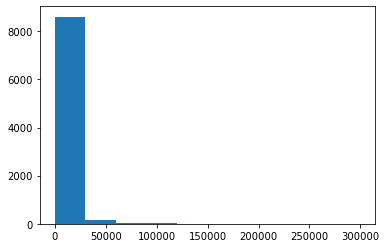

In [3210]:
# Linear scale
plt.hist('pay_amt1', data =df)

plt.show()

# we could not get a meaningful plot

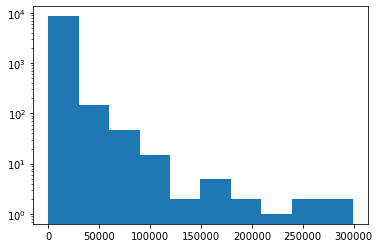

In [3211]:
# Log scale
plt.hist('pay_amt1', log = True, data =df)

plt.show()

# right skewed

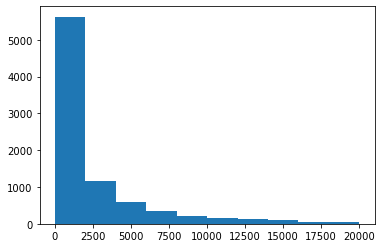

In [3212]:
# Linear scale
plt.hist('pay_amt1', data =df,range = [0, 20000])

plt.show()

# between 0 -20k range there is a right skewed data.

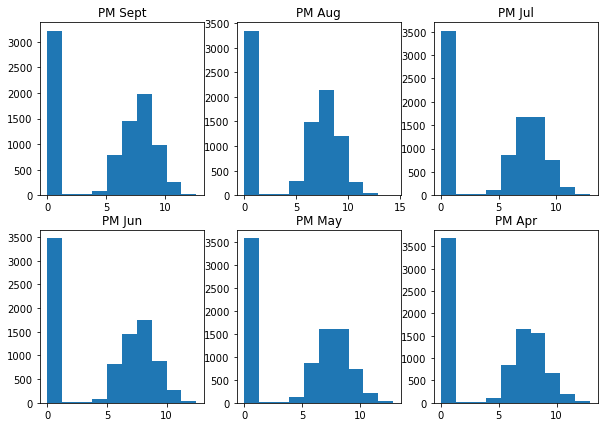

In [3213]:
# we can see the distribution of pay amounts with log values

figure, axis = plt.subplots(2, 3, figsize=(10, 7))
figure = figsize=(3, 3)
  
# For Sine Function
axis[0, 0].hist(np.log1p(df['pay_amt1']))
axis[0, 0].set_title("PM Sept")
  
# For Cosine Function
axis[0, 1].hist(np.log1p(df['pay_amt2']))
axis[0, 1].set_title("PM Aug")

# For Cosine Function
axis[0, 2].hist(np.log1p(df['pay_amt3']))
axis[0, 2].set_title("PM Jul")
  
# For Tangent Function
axis[1, 0].hist(np.log1p(df['pay_amt4']))
axis[1, 0].set_title("PM Jun")
  
# For Tanh Function
axis[1, 1].hist(np.log1p(df['pay_amt5']))
axis[1, 1].set_title("PM May")

# For Tanh Function
axis[1, 2].hist(np.log1p(df['pay_amt6']))
axis[1, 2].set_title("PM Apr")
  
# Combine all the operations and display
plt.show()

##### Amount of bill statement 

In [3214]:
df['bill_amt1'].value_counts().head()

0       1733
390      175
2500      58
316       55
780       52
Name: bill_amt1, dtype: int64

In [3215]:
df['bill_amt1'].describe()

count      8827.000000
mean      13590.405574
std       35577.931198
min      -14386.000000
25%         108.000000
50%        1761.000000
75%        9124.000000
max      581775.000000
Name: bill_amt1, dtype: float64

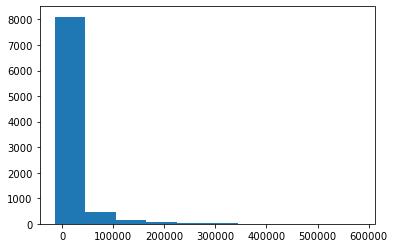

In [3216]:
# Linear scale
plt.hist('bill_amt1', data =df)

plt.show()

# we could not get a meaningful plot

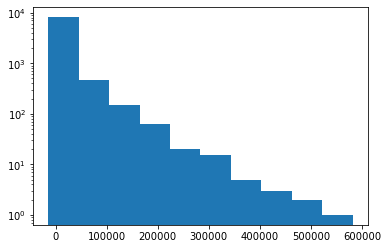

In [3217]:
# Log scale
plt.hist('bill_amt1', log = True, data =df)

plt.show()

# right skewed

In [3218]:
df['bill_amt1'].tail()

29985        0
29986     2220
29989     3425
29991     2500
29994    72557
Name: bill_amt1, dtype: int64

#### Box plot

##### Amount of previous payment 

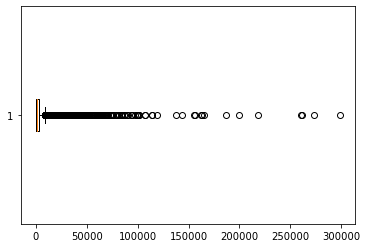

In [3219]:
# Lienar scale
plt.boxplot('pay_amt1', vert=False, data =df)

plt.show()

# there is a lot of outlier

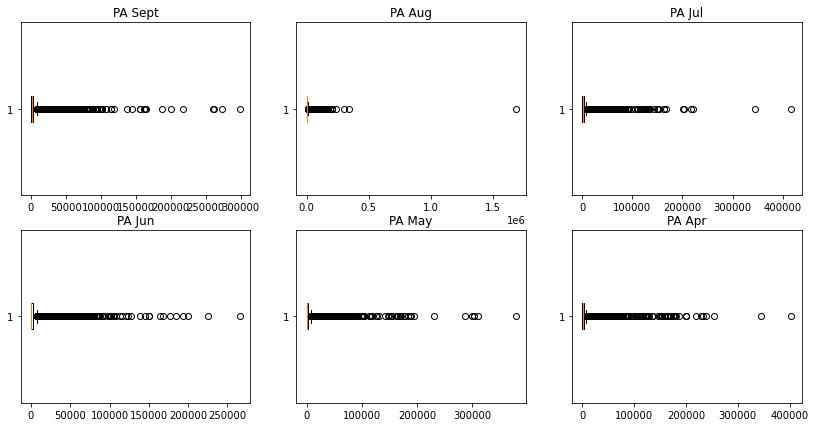

In [3220]:
# we can see the outliers of pay amounts

figure, axis = plt.subplots(2, 3, figsize=(14, 7))

axis[0, 0].boxplot('pay_amt1', vert=False, data =df)
axis[0, 0].set_title("PA Sept")
  
axis[0, 1].boxplot('pay_amt2', vert=False, data =df)
axis[0, 1].set_title("PA Aug")

axis[0, 2].boxplot('pay_amt3', vert=False, data =df)
axis[0, 2].set_title("PA Jul")
  
axis[1, 0].boxplot('pay_amt4', vert=False, data =df)
axis[1, 0].set_title("PA Jun")
  
axis[1, 1].boxplot('pay_amt5', vert=False, data =df)
axis[1, 1].set_title("PA May")

axis[1, 2].boxplot('pay_amt6', vert=False, data =df)
axis[1, 2].set_title("PA Apr")
  
# Combine all the operations and display
plt.show()

##### Amount of bill statement 

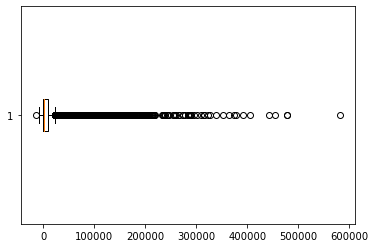

In [3221]:
# Lienar scale
plt.boxplot('bill_amt1', vert=False, data =df)

plt.show()

# there is a lot of outlier

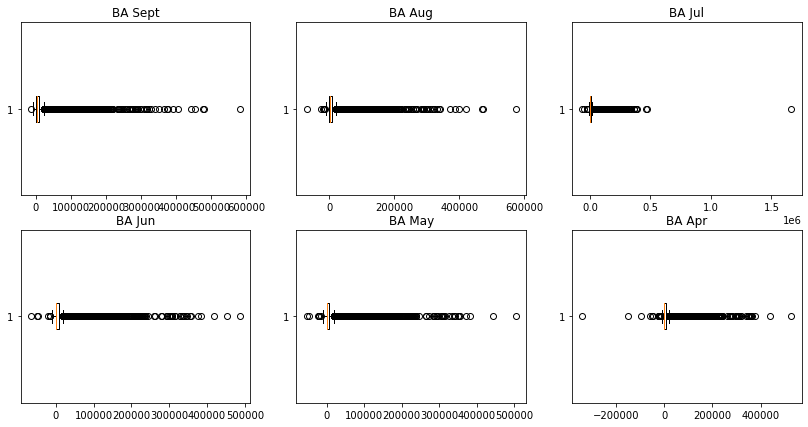

In [3222]:
# we can see the outliers of pay amounts

figure, axis = plt.subplots(2, 3, figsize=(14, 7))

axis[0, 0].boxplot('bill_amt1', vert=False, data =df)
axis[0, 0].set_title("BA Sept")
  
axis[0, 1].boxplot('bill_amt2', vert=False, data =df)
axis[0, 1].set_title("BA Aug")

axis[0, 2].boxplot('bill_amt3', vert=False, data =df)
axis[0, 2].set_title("BA Jul")
  
axis[1, 0].boxplot('bill_amt4', vert=False, data =df)
axis[1, 0].set_title("BA Jun")
  
axis[1, 1].boxplot('bill_amt5', vert=False, data =df)
axis[1, 1].set_title("BA May")

axis[1, 2].boxplot('bill_amt6', vert=False, data =df)
axis[1, 2].set_title("BA Apr")
  
# Combine all the operations and display
plt.show()

#### Count plot

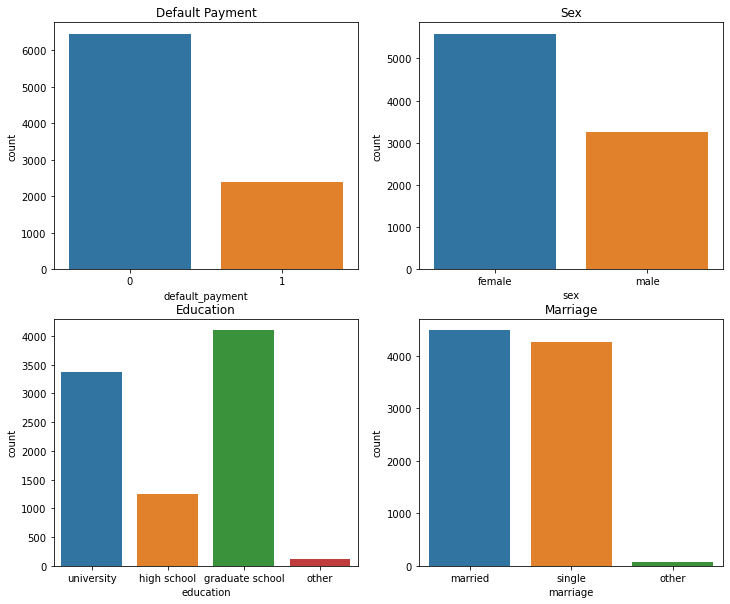

In [3223]:
# we can see the outliers of pay amounts

figure, axis = plt.subplots(2, 2, figsize=(12,10 ))
  
sns.countplot(ax=axis[0,0], x=df['default_payment'])
axis[0,0].set_title('Default Payment')

# For Cosine Function
sns.countplot(ax=axis[0,1], x=df['sex'])
axis[0, 1].set_title("Sex")


sns.countplot(ax=axis[1,0], x=df['education'])
axis[1, 0].set_title("Education")
  
# For Tanh Function
sns.countplot(ax=axis[1,1], x=df['marriage'])
axis[1, 1].set_title("Marriage")


# Combine all the operations and display
plt.show()

##### Look at the target variable

In [3224]:
# our target variable is default_payment 
# default payment (Yes = 1, No = 0)

In [3225]:
df.default_payment.value_counts(normalize=True)

0    0.729353
1    0.270647
Name: default_payment, dtype: float64

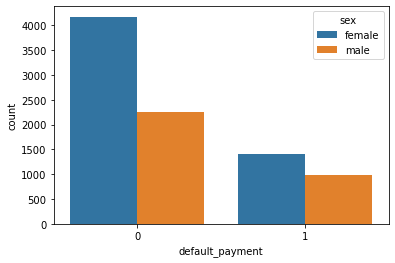

In [3226]:
sns.countplot(x='default_payment',hue = 'sex', data=df)
plt.show()

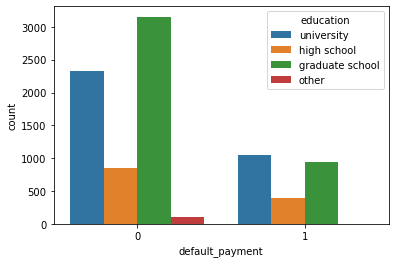

In [3227]:
sns.countplot(x='default_payment',hue = 'education', data=df)
plt.show()

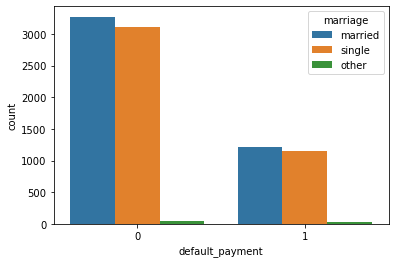

In [3228]:
sns.countplot(x='default_payment',hue = 'marriage', data=df)
plt.show()

##  Feature importance

### Mutual information

In [3229]:
def mutual_info_default_pay(series):
    return mutual_info_score(series, df.default_payment)

In [3252]:
categorical = ['sex', 'education', 'marriage', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [3253]:
mi = df[categorical].apply(mutual_info_default_pay)

In [3254]:
mi.sort_values(ascending=False)

pay_1        0.086407
pay_2        0.078619
pay_5        0.075346
pay_4        0.074768
pay_3        0.072600
pay_6        0.072244
education    0.006688
sex          0.001533
marriage     0.000076
dtype: float64

In [3255]:
mi = mi.sort_values(ascending=True)

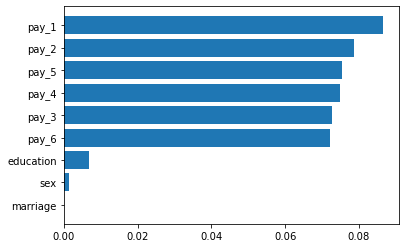

In [3257]:
plt.barh(mi.index, mi.values)
plt.show()

### Correlation

In [3247]:
numerical = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

In [3248]:
df[numerical].corrwith(df.default_payment).abs().sort_values(ascending=False)

bill_amt5    0.200493
limit_bal    0.193820
bill_amt6    0.188855
bill_amt4    0.188629
bill_amt2    0.184384
bill_amt1    0.174515
bill_amt3    0.162707
pay_amt1     0.105207
pay_amt3     0.087770
pay_amt4     0.083947
pay_amt5     0.080658
pay_amt6     0.074752
pay_amt2     0.059574
age          0.019194
dtype: float64

## Logistic Regression

In [3258]:
model = LogisticRegression(max_iter= 300)

- when solver is sag i got this warning 

ConvergenceWarning: The max_iter was reached which means the coef_ did not converge

- when solver is lbfgs i got this warning

ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

- to solve this warning i set max_iter > 200

In [3259]:
model.fit(X_train, y_train )

LogisticRegression(max_iter=300)

In [3260]:
model.score(X_val, y_val)

0.7644394110985278

In [3261]:
model.score(X_test, y_test)

0.7746319365798414

In [3123]:
y_pred = model.predict_proba(X_val)[:,1]

In [3264]:
roc_auc_score(y_val,y_pred)

0.7595124096150088

In [3130]:
model = LogisticRegression(max_iter=600)

In [3271]:
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=600)

In [3272]:
model.score(X_test, y_test)

0.7978482446206115

In [3273]:
y_pred = model.predict_proba(X_test)[:,1]

In [3274]:
roc_auc_score(y_test,y_pred)

0.7745737698234743

## Decision Trees

In [3275]:
dt = DecisionTreeClassifier()

In [3276]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [3277]:
dt.score(X_val, y_val)

0.6891279728199321

In [3278]:
y_pred = dt.predict_proba(X_val)[:,1]

In [3279]:
roc_auc_score(y_val,y_pred)

0.6201289818252883

* selecting `max_depth`
* selecting `min_samples_leaf`

In [3280]:
depths = [1, 2, 3, 4, 5, 6,7,8,9,10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    score = dt.score(X_val, y_val)
    print('%4s -> %.3f -> %.3f' % (depth, auc,score))
    
# best depth is 3

   1 -> 0.704 -> 0.790
   2 -> 0.749 -> 0.794
   3 -> 0.755 -> 0.790
   4 -> 0.750 -> 0.786
   5 -> 0.750 -> 0.792
   6 -> 0.746 -> 0.789
   7 -> 0.739 -> 0.787
   8 -> 0.731 -> 0.781
   9 -> 0.721 -> 0.783
  10 -> 0.703 -> 0.772
  15 -> 0.664 -> 0.738
  20 -> 0.638 -> 0.713
None -> 0.617 -> 0.683


In [3281]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,mean_absolute_error,mean_squared_error,r2_score


In [3282]:
scores = []
# [1, 5, 10, 15, 20, 500, 100, 200]
for depth in [2,3, 4,5]:
    for s in range(1,110):
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        y_pred2 = dt.predict(X_val)
        auc=roc_auc_score(y_val, y_pred)
        acc = accuracy_score(y_val, y_pred2 )
        prec = precision_score(y_val, y_pred2)
        rec = recall_score(y_val, y_pred2)
        f1 = f1_score(y_val, y_pred2)
        mae = mean_absolute_error(y_val,y_pred)
        mse = mean_squared_error(y_val,y_pred)
        rms =  mean_squared_error(y_val,y_pred, squared=False)
        r2 = r2_score(y_val,y_pred)
        
        scores.append((depth, s, auc,acc,prec,rec,f1,mae,mse,rms,r2))

In [3283]:
columns = ['max_depth', 'min_samples_leaf', 'auc','acc','prec','rec','f1','mae','mse','rms','r2']
df_scores = pd.DataFrame(scores, columns=columns)

In [3287]:
df_scores.sort_values('f1',ascending=False)

,max_depth,min_samples_leaf,auc,acc,prec,rec,f1,mae,mse,rms,r2
217,3,109,0.760915,0.793318,0.656338,0.489496,0.560770,0.308855,0.154161,0.392634,0.217003
216,3,108,0.760774,0.793318,0.656338,0.489496,0.560770,0.308869,0.154395,0.392932,0.215814
215,3,107,0.760633,0.793318,0.656338,0.489496,0.560770,0.308969,0.154568,0.393152,0.214937
214,3,106,0.760633,0.793318,0.656338,0.489496,0.560770,0.308978,0.154590,0.393180,0.214823
213,3,105,0.760633,0.793318,0.656338,0.489496,0.560770,0.308987,0.154614,0.393210,0.214705
...,...,...,...,...,...,...,...,...,...,...,...
132,3,24,0.755415,0.789921,0.735426,0.344538,0.469242,0.309708,0.155632,0.394502,0.209533
133,3,25,0.755415,0.789921,0.735426,0.344538,0.469242,0.309708,0.155632,0.394502,0.209533
134,3,26,0.755415,0.789921,0.735426,0.344538,0.469242,0.309708,0.155632,0.394502,0.209533
109,3,1,0.755415,0.789921,0.735426,0.344538,0.469242,0.309708,0.155632,0.394502,0.209533


In [3288]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=109)
dt.fit(X_train, y_train)
dt.score(X_val, y_val)

0.7933182332955833

In [ ]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

In [ ]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [3292]:
for a,b in (zip(dv.get_feature_names(), dt.feature_importances_)):
    print(a,b)

age 0.0
bill_amt1 0.10507913388910108
bill_amt2 0.0
bill_amt3 0.0
bill_amt4 0.00936359776417931
bill_amt5 0.0
bill_amt6 0.0
education=graduate school 0.0
education=high school 0.0
education=other 0.0
education=university 0.0
limit_bal 0.0
marriage=married 0.0
marriage=other 0.0
marriage=single 0.0
pay_1 0.09362987880509262
pay_2 0.7330485614635923
pay_3 0.0
pay_4 0.0
pay_5 0.0
pay_6 0.0
pay_amt1 0.0
pay_amt2 0.010844410836655128
pay_amt3 0.0
pay_amt4 0.048034417241379655
pay_amt5 0.0
pay_amt6 0.0
sex=female 0.0
sex=male 0.0
